### Using a decision tree classifier to decide whether the banknote is authenticate or fake. Also using bagging classifier to improve the performance of the algorithm developed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

ModuleNotFoundError: No module named 'numpy'

In [ ]:
# DATASET - banknotes_authentication.csv
df=pd.read_csv("D:/ML Dataset/banknotes_authentication.csv")
df.head(5)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df.shape

(1372, 5)

In [ ]:
df.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class'], dtype='object')

In [ ]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [ ]:
df.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [ ]:
df['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [ ]:
x = df.iloc[:,:-1].values
print(x)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [ ]:
y=df.iloc[:,-1].values
print(y)

[0 0 0 ... 1 1 1]


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
print('x_train :','\n',x_train)

x_train : 
 [[ 0.74054   0.36625   2.1992    0.48403 ]
 [-2.3518   -4.8359    6.6479   -0.060358]
 [-0.77688   0.13036  -0.031137 -0.35389 ]
 ...
 [-4.3667    6.0692    0.57208  -5.4668  ]
 [ 2.0466    2.03      2.1761   -0.083634]
 [-2.3147    3.6668   -0.6969   -1.2474  ]]


In [ ]:
print('x_test :','\n',x_test)

x_test : 
 [[-3.551    1.8955   0.1865  -2.4409 ]
 [ 1.3114   4.5462   2.2935   0.22541]
 [-4.0173  -8.3123  12.4547  -1.4375 ]
 ...
 [ 4.7285   2.1065  -0.28305  1.5625 ]
 [ 6.8248   5.2187  -2.5425   0.5461 ]
 [ 3.5251   0.7201   1.6928   0.64438]]


In [ ]:
# Feature scaling
# using standardisation on Independent column and not on dependent column as it is in 0 and 1.
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)
print(x_train[0:5,:])

[[ 0.10527877 -0.27983064  0.2259937   0.78802844]
 [-0.99840564 -1.18889897  1.31324557  0.52830217]
 [-0.4363023  -0.32105208 -0.31909545  0.38825872]
 [-0.89636532 -0.1601366  -0.42463686  0.0335318 ]
 [-1.03559558 -0.38650242  0.03167312  0.33828751]]


In [ ]:
# Decision Tree
clf_entropy=DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=9) #max_depth is 7
clf_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=1)

In [ ]:
y_predict=clf_entropy.predict(x_test)
print('Predicted Value: ','\n',y_predict[0:10])

Predicted Value:  
 [1 0 1 1 0 0 0 0 0 0]


In [ ]:
# Confusion Matrix
cf=confusion_matrix(y_test,y_predict)
print('Confusion Matrix','\n',cf)

Confusion Matrix 
 [[233   2]
 [  3 174]]


In [ ]:
# Accuracy Score
print('Accuracy :','\n',accuracy_score(y_test,y_predict)*100,'%')

Accuracy : 
 98.7864077669903 %


In [ ]:
# Classification Report
print('Report :','\n',classification_report(y_test,y_predict))

Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       235
           1       0.99      0.98      0.99       177

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



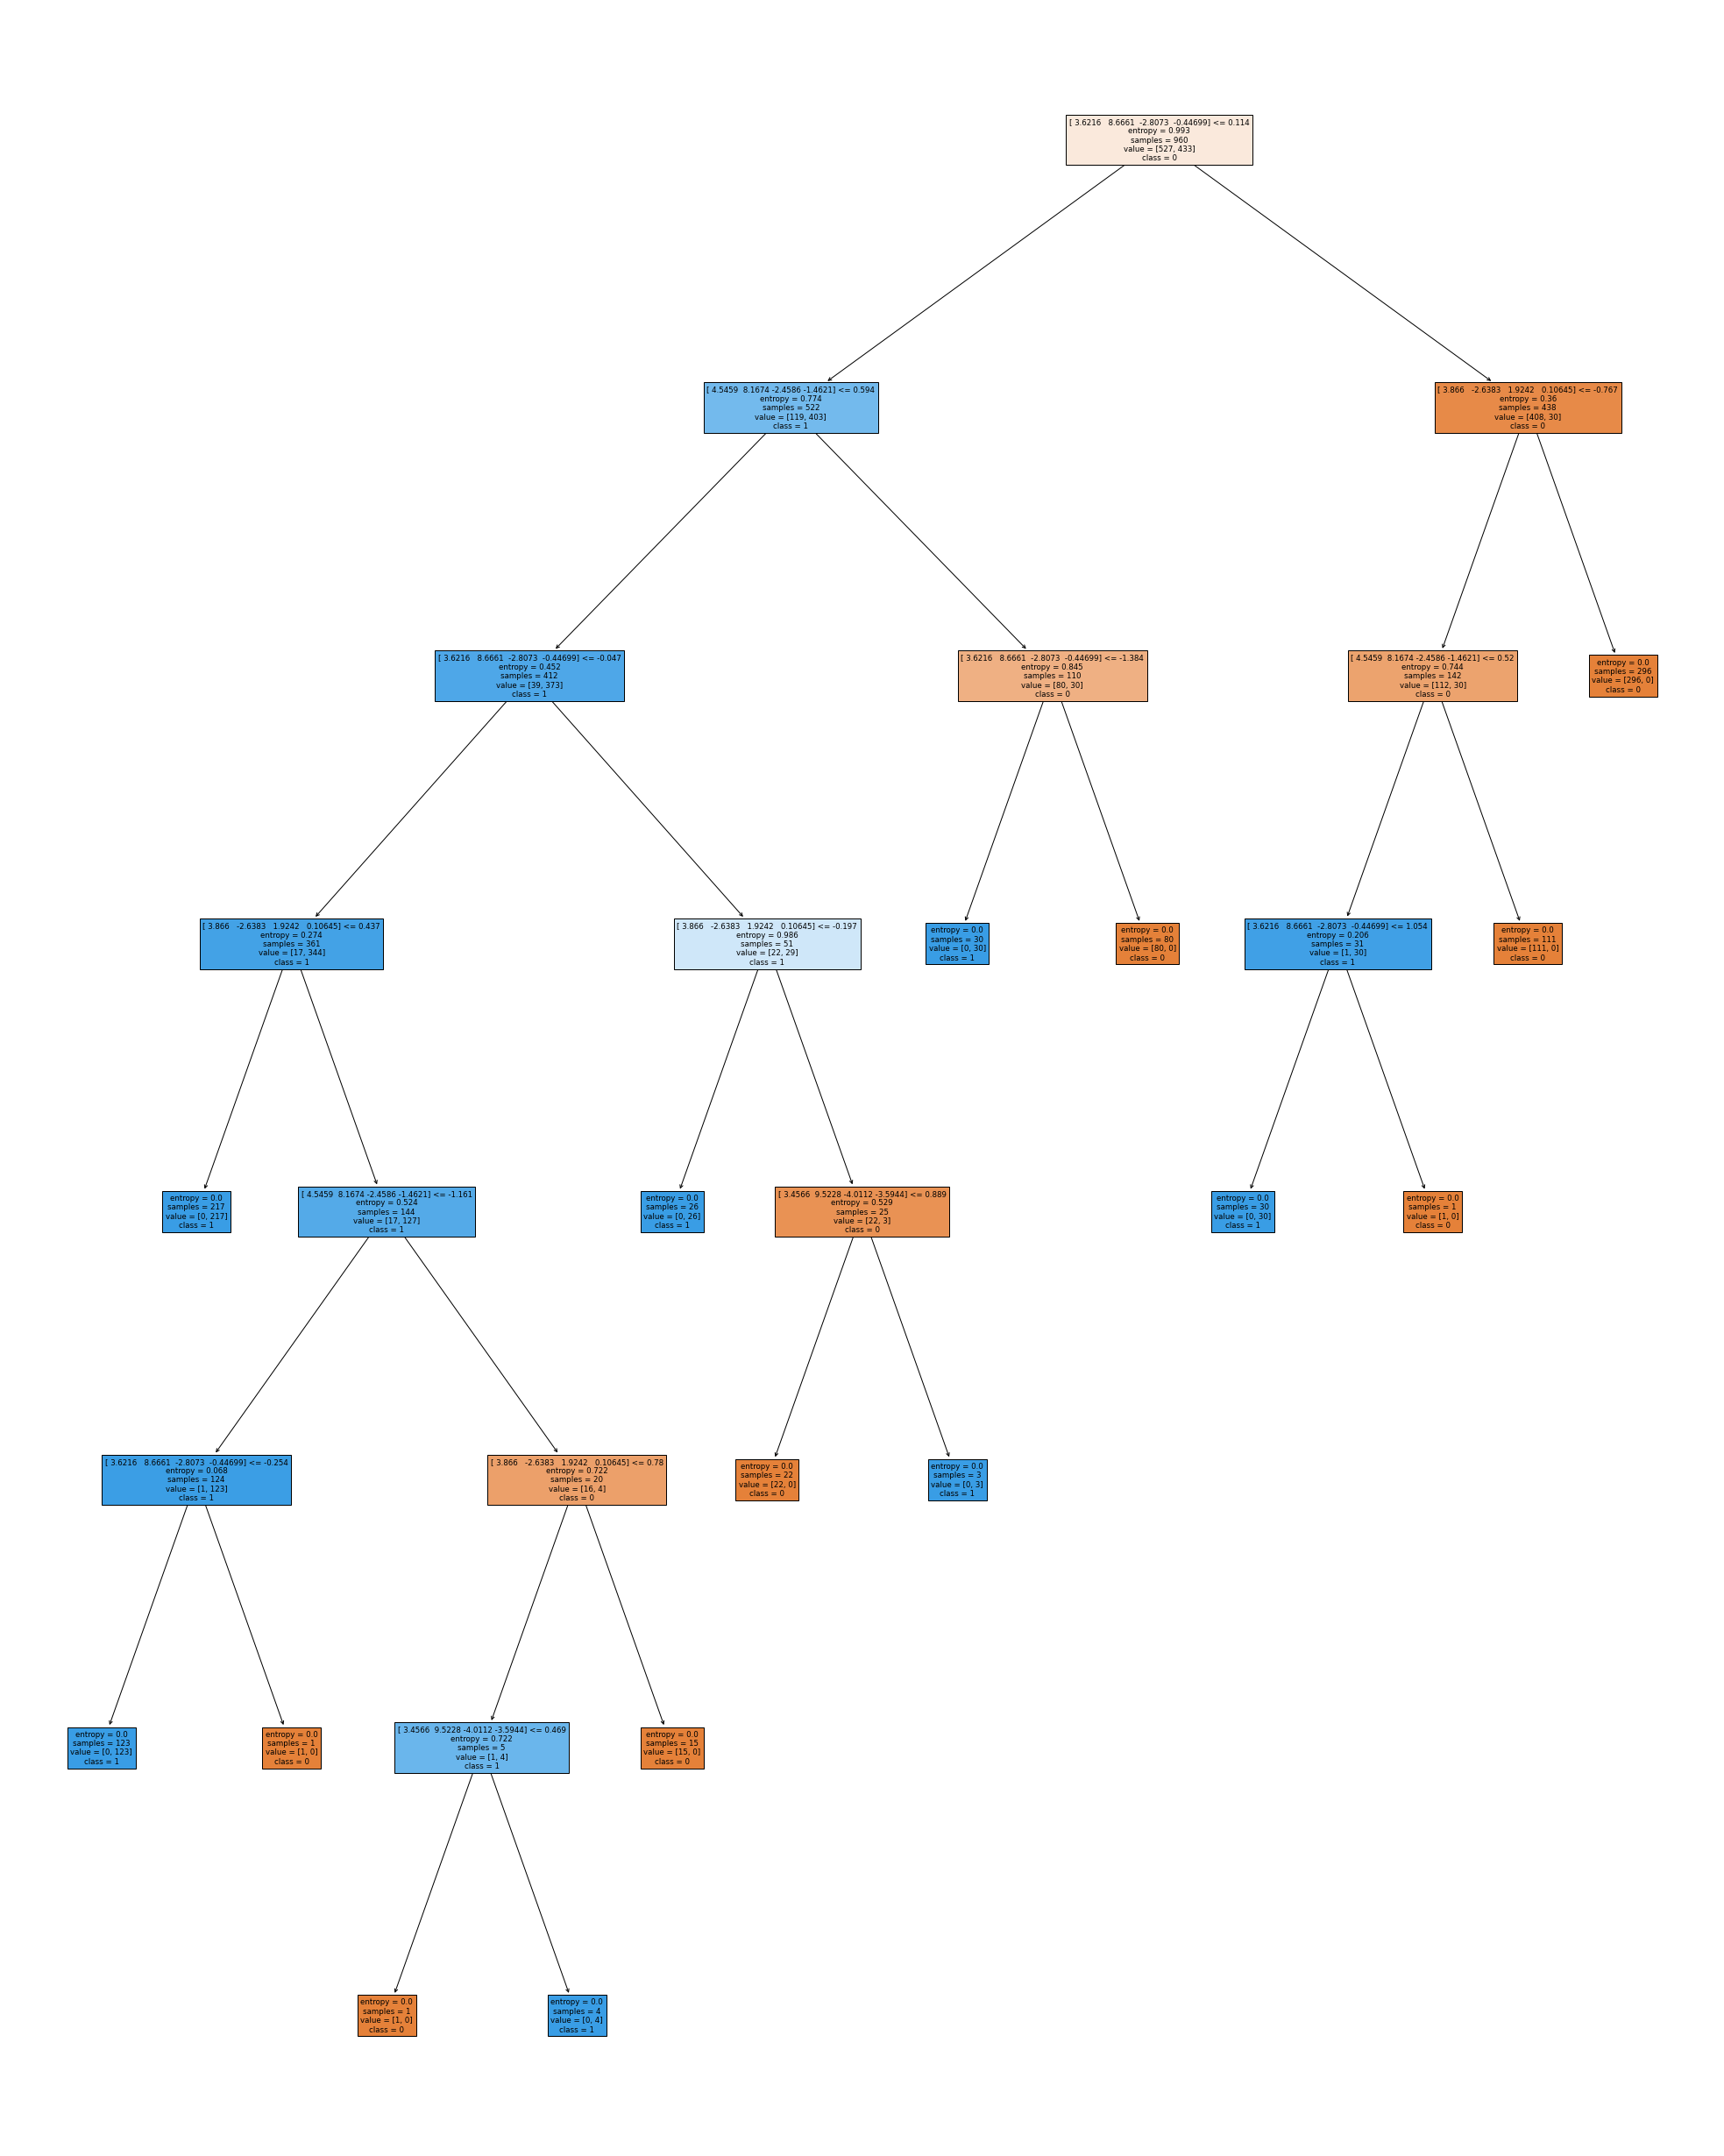

In [ ]:
# Decision Tree Formation
fig=plt.figure(figsize=(35,45))
a=tree.plot_tree(clf_entropy,feature_names=x,class_names=['0','1'],filled=True)

In [ ]:
tree=DecisionTreeClassifier(random_state=1)
tree=tree.fit(x_train,y_train)
bag=BaggingClassifier(base_estimator=tree,n_estimators=500,random_state=1)
bag=bag.fit(x_train,y_train)
y_train_pred=bag.predict(x_train)
y_test_pred=bag.predict(x_test)


In [ ]:
# Bagging Prediction
bag_test=round(accuracy_score(y_test,y_test_pred),2)*100
print(bag_test,"%")

99.0 %
